# HOMEWORK 2 - CONSTRUCTING AND ANALYZING LAPLACE TRANSFORMS FOR REACTION NETWORKS

In this homework, you will construct a Laplace transform for a reaction network and predict its response to initial conditions.

The reaction network you will analyze is:

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_3 \xrightarrow[\text{}]{k_3 S_3} S_2$,

In your computational studies, use $k_1 = 1$, $k_2 = 2$, $k_3 = 2.5$.
The initial conditions for $S_1 = 5$; all other species are initialized to 0.

You should submit your homework as a collab notebook with a separate section for each question.

**Questions**
1. (1 pt) Write Antimony code for the reaction network and simulate it under initial conditions.
1. (5 pt) Find the transfer function $G(s) = \frac{S_3(s)}{S_1 (s)}$. Show steps: (a) construct system equations; (b) convert to Laplace Transforms; and (c) calculate the transfer function.
You will get two points extra credit if you submit your work in LaTex.
1. (1 pt) What are the poles of $G(s)$? Is the system stable? Does it oscillate?
1. (3 pt) We can interpret the simulation in (1) as a response of the transfer function
to the input signal $S_1 (s) = \frac{5}{s + k_1}$. Show that the predicted value of $S_3$ at time
$\infty$ (the "final value") is consistent with the simulation in (1). (Hint: The final value of the Laplace transform $G(s)$
is $lim_{s\rightarrow \infty} s G(s)$.) Why is the final value less than the initial value of $S_1$?

# Preliminaries

In [6]:
!pip install -q tellurium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tellurium as te

# Helpful Hints

## LaTex Basics

1. All LaTex appears between dollar signs (``$``)
1. Subscripts: $x_2$
1. Superscript: $x^2$
1. Summation: $\sum_{n=0}^{\infty} e^{nt}$
1. Derivatives: $\dot{x}(t)$
1. Bold: ${\bf A}$
1. Fractions: $\frac{a}{b}$

## Steps in Constructing Lapalce Transforms
1. Specify the input and output for the transfer function.
1. Write the system equations.
1. Convert to Laplace transforms.
1. Solve for the output LT in terms of the input LT and form the ratio.

# Q1: Write Antimony Code for the Reaction Network

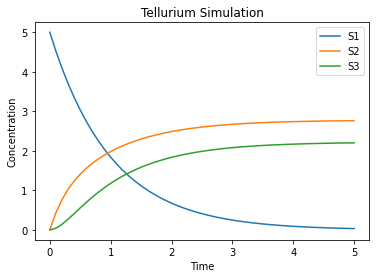

In [12]:
tellurium_model = """
J1: S1 -> S2; k1*S1
J2: S2 -> S3; k2*S2
J3: S3 -> S2; k3*S3

k1 = 1
k2 = 2
k3 = 2.5
S1 = 5
S2 = 0
S3 = 0
"""
model_RR = te.loada(tellurium_model)
model_data = model_RR.simulate()
plt.figure()
plt.plot(model_data[:,0],model_data[:,1], label='S1')
plt.plot(model_data[:,0],model_data[:,2], label='S2')
plt.plot(model_data[:,0],model_data[:,3], label='S3')
plt.title('Tellurium Simulation')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.legend()

# Q2: Derive the transfer function $\frac{S_3(s)}{S_1(s)}$

**Stoichiometry Matrix**
\begin{pmatrix}
-1 & 0 & 0\\
1 & -1 & 1\\
0 & 1 & -1
\end{pmatrix}

**Flux Vector**
\begin{pmatrix}
k_1S_1\\
k_2S_2\\
k_3S_3
\end{pmatrix}

**System Equations**

$\dot{S_1}(t)$ $=$ $-k_1$*$S_1$ \\
$\dot{S_2}(t)$ $=$ $k_1$*$S_1$ $-$ $k_2$*$S_2$ $+$ $k_3$*$S_3$ \\
$\dot{S_3}(t)$ $=$ $k_2$*$S_2$ $-$ $k_3$*$S_3$

**Laplace Transforms**

$\mathcal{L}${$\dot{S_1}$} $=$ s${S_1}(s)$ $-$ $5$ $=$ $-k_1$$S_1(s)$ \\
$\mathcal{L}${$\dot{S_2}$} $=$ s${S_2}(s)$ $=$ $k_1$$S_1(s)$ $-$ $k_2$$S_2(s)$ $+$ $k_3$$S_3(s)$ \\
$\mathcal{L}${$\dot{S_3}$} $=$ s${S_3}(s)$ $=$ $k_2$$S_2(s)$ $-$ $k_3$$S_3(s)$

**Re-arrange to Obtain Transfer Function**

$(s+{k_2})$${S_2}(s)$ $=$ ${k_1}{S_1}(s)$ + ${k_3}{S_3}(s)$ \\
${S_2}(s)$ $=$ $\frac{{k_1}{S_1}(s) + {k_3}{S_3}(s)}{s+{k_2}}$ \\
s${S_3}(s)$ $=$ ${k_2}$$\frac{{k_1}{S_1}(s) + {k_3}{S_3}(s)}{s+{k_2}}$ $-$ $k_3$$S_3(s)$ \\
s(s+${k_2}$)${S_3}(s)$ $=$ ${k_2}{k_1}{S_1}(s)$ + ${k_3}{k_2}{S_3}(s)$ $-$ (s+${k_2}$) $k_3$$S_3(s)$ \\
(s(s+${k_2}$) $+$ ${k_3}$(s+${k_2}$) $-$ ${k_3}{k_2}$)${S_3}(s)$ $=$ ${k_2}{k_1}{S_1}(s)$ \\

**Transfer Function**

$G(s)$ $=$ $\frac{S_3}{S_1}$ $=$ $\frac{{k_2}{k_1}}{(s(s+{k_2}) + {k_3}(s+{k_2}) - {k_3}{k_2})}$ \\
$G(s)$ $=$ $\frac{S_3}{S_1}$ $=$ $\frac{{k_2}{k_1}}{s^2+{k_2}s + {k_3}(s+{k_2}) - {k_3}{k_2}}$ \\
$G(s)$ $=$ $\frac{{k_2}{k_1}}{s^2+({k_2}+{k_3})s}$ \\
**Plugging in Values for Constants**

$G(s)$ $=$ $\frac{2}{{s^2}+{4.5}s}$  

# Q3: Poles of the Transfer Function

**Setting Denominator of Transfer Function = 0**

${s^2+{k_2}s +{k_3}s}$ $=$ $0$ \\

${s^2}$ $+$ $4.5$s $=$ $0$ \\
$s$ $=$ $0$ \\
$s$ $=$ $-4.5$ \\
The system is stable and non-oscillatory as the roots of the characteristic equation are real and non-positive.

# Q4: Response to the Input Signal

In [15]:
## Extract Final Value of Tellurium Simulation for S3
S3_FINAL_VALUE = model_data[-1,3]
S2_FINAL_VALUE = model_data[-1,2]
print('Final Value of S3:',S3_FINAL_VALUE)
print('Final Value of S2:',S2_FINAL_VALUE)
print('Final S2 + S3:',S3_FINAL_VALUE+S2_FINAL_VALUE)

Final Value of S3: 2.202970872553076
Final Value of S2: 2.763339257460371
Final S2 + S3: 4.966310130013447


**Calculating the Final Value of the Transfer Function**
$\lim{s \to \infty}$ s$G(s)$ \\
$G(s)$ $=$ $\frac{2}{{s^2}+{4.5}s}$  \\
$sG(s)$ $=$ $\frac{2s}{{s^2}+{4.5}s}$  \\
$sG(s)$ $=$ $\frac{2}{{s}+{4.5}}$  \\
$\lim{s \to 0}$ s$G(s)$ $=$ $0.44$ \\
**Calculating the Final Value of ${S_3}$**

s$G(s)$ $=$ $0.44$ \\
$G(s)$ = $\frac{{S_3}}{{S_1}}$ \\
As we know that the initial value of ${S_1}$ $=$ $5$ \\
Then the final value of ${S_3}$ $=$ $0.44(5)$ $=$ $2.2$ (as ${S_3}$ $=$ ${G(s)}{S_1}$)

Both the simulation and the predicted value agree that the final concentration of species ${S_3}$ $=$ $2.2$

Why is the final value less than the initial value of $S_1$?

Our system equations show us that ${S_1}$ is being converted into ${S_2}$ which is being reversibly converted into ${S_3}$. Therefore, at equilibrium, not all of the mass flux of ${S_1}$ will have been funnelled into ${S_3}$ production, there will be a mix of ${S_3}$ and ${S_2}$ due to the equilibrium reaction. This is proved by the model, if you add up the final concentration values of species ${S_2}$ and ${S_3}$ you get approximately 5 (or the starting concentration of species ${S_1}$).